# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# mobilenetV1 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history, count_parameters
from classifiers.mobilenet import MobileNetV1

model = MobileNetV1(num_classes=10)
print(model)
num_params = count_parameters(model)
print('params num:', num_params)

MobileNetV1(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU6(inplace)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
      (3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1

# train 

In [3]:
%%time
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(model, opt, loss_fn)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)
# lr_scheduler = None
history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/150, lr:1.00e-01
[##################################################] 100.00% loss:1.6 acc:41.38% val_loss:1.3 val_acc:55.26%
Epoch: 2/150, lr:1.00e-01
[##################################################] 100.00% loss:1.1 acc:61.95% val_loss:1.0 val_acc:65.84%
Epoch: 3/150, lr:1.00e-01
[##################################################] 100.00% loss:0.81 acc:71.77% val_loss:0.91 val_acc:70.92%
Epoch: 4/150, lr:1.00e-01
[##################################################] 100.00% loss:0.66 acc:77.04% val_loss:0.74 val_acc:76.08%
Epoch: 5/150, lr:1.00e-01
[##################################################] 100.00% loss:0.58 acc:79.97% val_loss:0.65 val_acc:79.04%
Epoch: 6/150, lr:1.00e-01
[##################################################] 100.00% loss:0.52 acc:82.26% val_loss:0.58 val_acc:80.64%
Epoch: 7/15

[##################################################] 100.00% loss:0.023 acc:99.25% val_loss:0.33 val_acc:92.82%
Epoch: 60/150, lr:2.50e-02
[##################################################] 100.00% loss:0.025 acc:99.13% val_loss:0.32 val_acc:92.68%
Epoch: 61/150, lr:2.50e-02
[##################################################] 100.00% loss:0.023 acc:99.24% val_loss:0.33 val_acc:92.52%
Epoch: 62/150, lr:2.50e-02
[##################################################] 100.00% loss:0.026 acc:99.12% val_loss:0.37 val_acc:91.96%
Epoch: 63/150, lr:2.50e-02
[##################################################] 100.00% loss:0.027 acc:99.10% val_loss:0.36 val_acc:92.80%
Epoch: 64/150, lr:2.50e-02
[##################################################] 100.00% loss:0.024 acc:99.17% val_loss:0.38 val_acc:92.38%
Epoch: 65/150, lr:2.50e-02
[##################################################] 100.00% loss:0.025 acc:99.13% val_loss:0.36 val_acc:92.26%
Epoch: 66/150, lr:2.50e-02
[##########################

[##################################################] 100.00% loss:0.0016 acc:99.97% val_loss:0.34 val_acc:93.66%
Epoch: 118/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0017 acc:99.96% val_loss:0.34 val_acc:93.66%
Epoch: 119/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0015 acc:99.98% val_loss:0.34 val_acc:93.68%
Epoch: 120/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0015 acc:99.98% val_loss:0.34 val_acc:93.74%
Epoch: 121/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0016 acc:99.97% val_loss:0.34 val_acc:93.66%
Epoch: 122/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0018 acc:99.96% val_loss:0.34 val_acc:93.56%
Epoch: 123/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0013 acc:99.98%% val_loss:0.34 val_acc:93.76%
Epoch: 124/150, lr:3.91e-04
[###########

# plot loss history
We check the classifier by plotting the loss and acc.

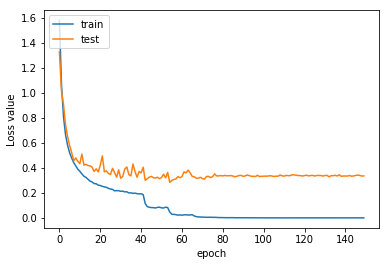

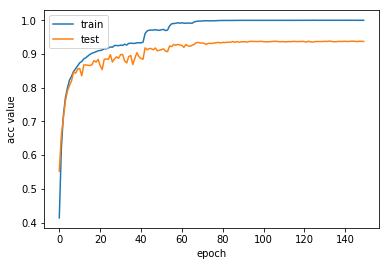

In [4]:
plot_history(history)

# test classifier
test on test data

In [5]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.36 test_acc:93.11%
